In [133]:
import pandas as pd # Veri işleme ve analiz için
import numpy as np # Sayısal hesaplamalar için
import seaborn as sns # Görselleştirme için
import matplotlib.pyplot as plt # Grafik çizimleri için

# Makine öğrenmesi modelleri
import xgboost as xgb  #XGBoost modeli
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.tree import DecisionTreeClassifier # Karar ağacı
from sklearn.neighbors import KNeighborsClassifier  # K-en yakın komşu
from sklearn.ensemble import RandomForestClassifier  # Rastgele orman
from sklearn.linear_model import LogisticRegression  # Lojistik regresyon

# Ön işleme (kategorik verileri sayısal verilere dönüştürmek için ve
# Kategorik verileri sayısal verilere dönüştürmek için
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Veriyi eğitim ve test olarak ayırma
from sklearn.model_selection import train_test_split

# Model değerlendirme metrikleri
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve



In [134]:
df = pd.read_csv("data.csv") #Veri setini okumak için read komutu kullandık
df.head() # İlk 5 satırın görüntülenmesi

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [135]:
# Gereksiz Sütunları Kaldırma
drop_cols = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
df = df.drop(columns=drop_cols)
# EmployeeNumber → Benzersiz ID
# EmployeeCount → Hepsi 1 (yani gereksiz)
# Over18 → Hepsi Y (yani gereksiz)
# StandardHours → Hepsi 80 (yani gereksiz)

In [136]:
(df.info())# Veri setinin genel yapısı hakkında bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [137]:
df.isnull().sum() # Eksik Veri Kontrolü

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [138]:
df.dtypes # Veri setindeki her sütunun veri tiplerini görüntüler

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [139]:
# Kategorik Değişkenler
kategorik = df.select_dtypes(include='object')

print("Kategorik değişkenler:", kategorik.columns.tolist())

Kategorik değişkenler: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [140]:
# Sayısal Değişkenler
sayisal = df.select_dtypes(include='number')
print("Sayısal değişkenler:", sayisal.columns.tolist())

Sayısal değişkenler: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [141]:
# Attrition Değişkenini Label Encode Etme
# Yes' ve 'No' değerlerini 1 ve 0 olarak dönüştürüyoruz
lb = LabelEncoder()  # LabelEncoder nesnesi oluşturuluyor
df['Attrition'] = lb.fit_transform(df['Attrition'])  


# Kategorik Verileri Encode Etme 
df = pd.get_dummies(df, columns=kategorik.columns.drop(["Attrition"]), drop_first=True)

# Sayısal Verileri Ölçekleme
scaler = StandardScaler() 
scaled_columns = ['Age', 'MonthlyIncome', 'YearsAtCompany']
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])# Seçilen sütunlara ölçekleme işlemi uygulanır

In [142]:
df # Bütün işlemeri yaptıktan sonra veri setimizi kontrol ediyoruz

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,1,1102,1,2,2,94,3,2,4,...,False,False,False,False,False,True,False,False,True,True
1,1.322365,0,279,8,1,3,61,2,2,2,...,False,False,False,False,True,False,False,True,False,False
2,0.008343,1,1373,2,2,4,92,2,1,3,...,True,False,False,False,False,False,False,False,True,True
3,-0.429664,0,1392,3,4,4,56,3,1,3,...,False,False,False,False,True,False,False,True,False,True
4,-1.086676,0,591,2,1,1,40,3,1,2,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0,884,23,2,3,41,4,2,4,...,True,False,False,False,False,False,False,True,False,False
1466,0.227347,0,613,6,1,4,42,2,3,1,...,False,False,False,False,False,False,False,True,False,False
1467,-1.086676,0,155,4,3,2,87,4,2,2,...,False,False,True,False,False,False,False,True,False,True
1468,1.322365,0,1023,2,3,4,63,2,2,2,...,False,False,False,False,False,True,False,True,False,False


In [143]:

X = df.drop(columns=["Attrition"]) #(Attrition) dışındaki tüm sütunlar özellik olarak seçilir
y = df['Attrition'] #(Attrition) seçilir

In [144]:
# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [145]:
reports = [] # Daha sonrasında modelleri karşılaştırmak için liste oluşturduk

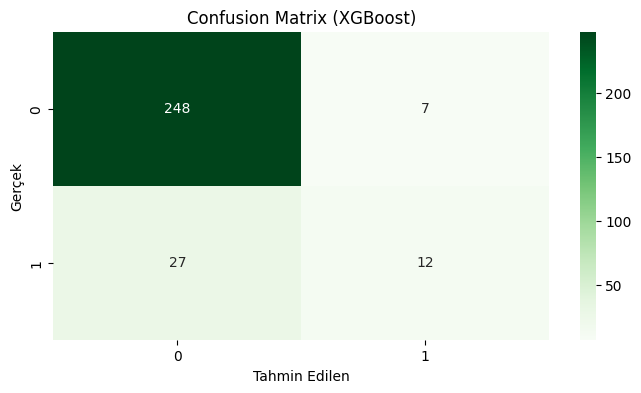

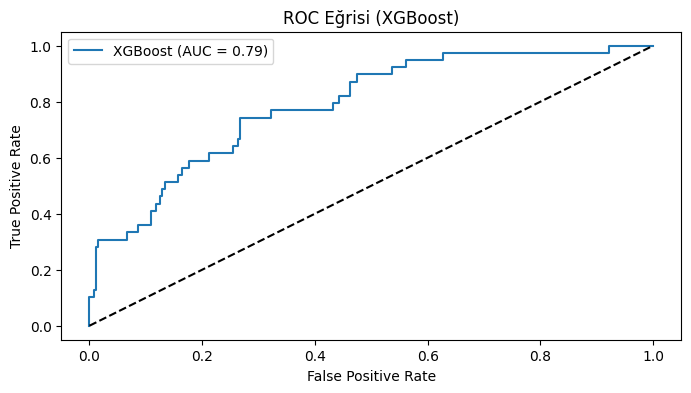

ROC AUC: 0.7886


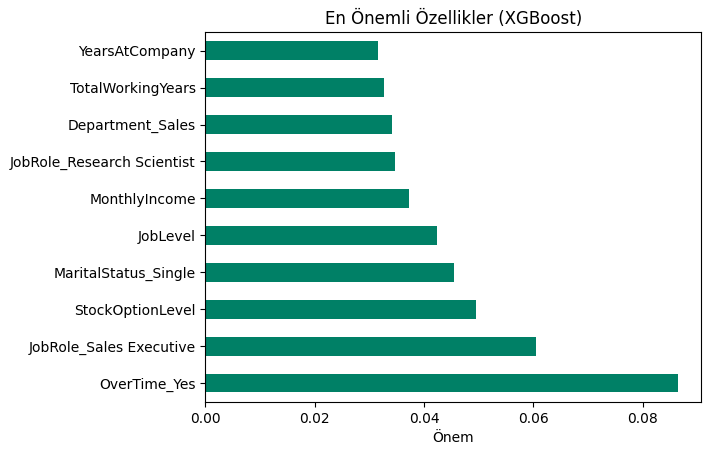

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       255
           1       0.63      0.31      0.41        39

    accuracy                           0.88       294
   macro avg       0.77      0.64      0.67       294
weighted avg       0.87      0.88      0.87       294



In [146]:
# Modeli eğitmek, tahmin yapmak, değerlendirmek (XGBoost)

# Modeli Eğitme
xgb_model = xgb.XGBClassifier()  # XGBoost sınıflandırıcı nesnesi oluşturuluyor
xgb_model.fit(X_train, y_train)  # Eğitim verisi ile model eğitiliyor

# Test Verisinde Tahmin Yapma
y_pred = xgb_model.predict(X_test) # Test verisi ile tahmin yapılıyor

# Değerlendirme
confusionMatrix = confusion_matrix(y_test, y_pred)  # Karışıklık matrisi hesaplanıyor
# Karışıklık matrisi, TP,FP,TN ve FN sonuçları içerir.

classReport = classification_report(y_test, y_pred)  # Sınıflandırma raporu çıkarılıyor
# Precision, recall, F1 skoru ve doğruluk gibi metrikleri gösterir.

reports.append(classification_report(y_test, y_pred, output_dict=True)) 
 # Sonuçlar karşılaştırma listesine ekleniyor

y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]  # Pozitif sınıf için olasılık değerleri alınıyor
# Test verisinde her bir örneğin pozitif sınıf olma olasılığ (1)hesaplanıyor.

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # ROC eğrisi için gerekli metrikler hesaplanıyor
# False Positive Rate ve True Positive Rate hesaplanarak ROC eğrisi çizilecektir.

rocScore = roc_auc_score(y_test, y_pred_prob)  # ROC AUC skoru hesaplanıyor
# ROC eğrisinin altındaki alanı hesaplar, yüksek AUC skoru iyi performansı gösterir.

# Confusion Matrix Çizme
plt.figure(figsize=(8,4)) # Grafik boyutunu ayarla
sns.heatmap(confusionMatrix,annot=True,fmt="d",cmap="Greens") # Isı haritası çiz, değerleri göster, tam sayı formatında, yeşil tonlarında
plt.title("Confusion Matrix (XGBoost)") # Grafik başlığı
plt.xlabel("Tahmin Edilen") # X ekseni etiketi
plt.ylabel("Gerçek") # Y ekseni etiketi
plt.show() # Grafiği göster

# ROC Eğrisini Çizme
plt.figure(figsize=(8,4))  # Grafik boyutu 8x4 olarak ayarlanır
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {rocScore:.2f})')  
# ROC eğrisi çizilir ve etiket olarak AUC değeri eklenir
plt.plot([0, 1], [0, 1], 'k--')  
# Rastgele tahmin eğrisini temsil eden diyagonal çizilir
plt.xlabel('False Positive Rate')  # X ekseni adı: Yanlış Pozitif Oranı
plt.ylabel('True Positive Rate')  # Y ekseni adı: Doğru Pozitif Oranı
plt.title('ROC Eğrisi (XGBoost)')  # Grafik başlığı belirlenir
plt.legend()  # Eğri etiketi (AUC değeri) gösterilir
plt.show()  # Grafiği ekrana çizdir

print(f"ROC AUC: {rocScore:.4f}")  
# AUC skoru terminale yazdırılır, modelin genel başarı seviyesi özetlenir


# En Önemli Özellikleri Belirtme
importances = xgb_model.feature_importances_ # Eğitilmiş XGBoost modelinden özellik önem skorlarını al
features = X.columns # Orijinal veri setindeki özellik (sütun) isimlerini al
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False).head(10)
 # Özellik önem skorlarını bir Pandas Serisine dönüştür,
 #  özellik isimleriyle eşleştir, azalan sıraya göre sırala ve en önemli ilk 10 özelliği seç
feat_importance.plot(kind='barh',cmap="summer") 
# En önemli 10 özelliği yatay çubuk grafik olarak çiz, "summer" renk haritasını kullan
plt.title(f"En Önemli Özellikler (XGBoost)") # Grafik başlığını ayarla
plt.xlabel("Önem") # X ekseni etiketini ayarla
plt.show() # Grafiği göster

#Raporu Gösterme
print(classReport) # Sınıflandırma raporunu (precision, recall, f1-score vb.) konsola yazdır

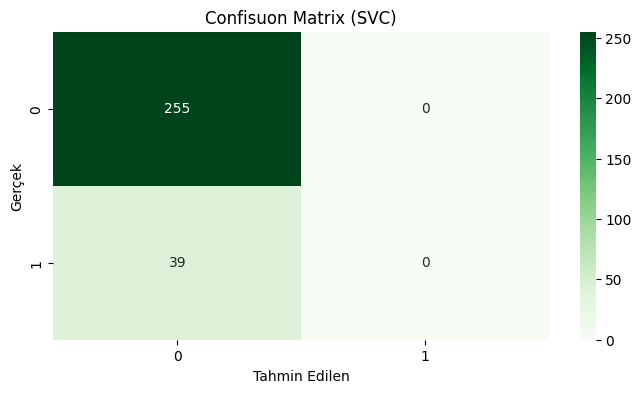

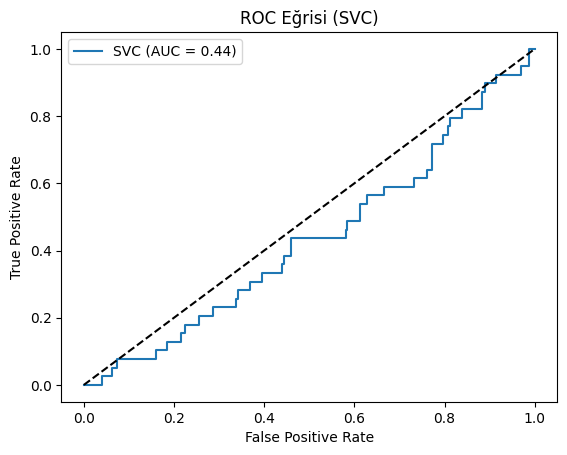

ROC AUC: 0.4357
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       1.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.93      0.50      0.46       294
weighted avg       0.88      0.87      0.81       294



In [147]:
#Modeli eğitmek, tahmin yapmak, değerlendirmek (SVC)

# Modeli Eğitme
svc_model = SVC(probability=True) 
#(Support Vector Classifier) modelini oluşturuyoruz 
#ve olasılık tahmini yapılabilmesi için 'probability=True' ekliyoruz.
svc_model.fit(X_train, y_train) # Modeli eğitim verisiyle eğitiyoruz.

# Test Verisinde Tahmin Yapma
y_pred = svc_model.predict(X_test)

# Değerlendirme
confisionMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred,zero_division=True) #Sınıflandırma raporu
reports.append(classification_report(y_test, y_pred,zero_division=True,output_dict=True))
#raporu sözlük formatında listeye ekle
y_proba = svc_model.predict_proba(X_test)[:, 1]  # Pozitif sınıfın olasılıkları
fpr, tpr, thresholds = roc_curve(y_test, y_proba)#roc eğrisi için gerekli olan fpr,tpr,eşik değer
rocScore = roc_auc_score(y_test, y_proba) #roc auc hesaplaması

# Confusion Matrix Çizme
plt.figure(figsize=(8,4))
sns.heatmap(confisionMatrix,annot=True,fmt="d",cmap="Greens")
plt.title("Confisuon Matrix (SVC)")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

# ROC Eğrisini Çizme
plt.plot(fpr, tpr, label=f'SVC (AUC = {rocScore:.2f})')#Roc eğrisi çizimi
plt.plot([0, 1], [0, 1], 'k--')# Rastgele sınıflandırıcıya ait referans çizgisi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi (SVC)')
plt.legend()
plt.show()

print(f"ROC AUC: {rocScore:.4f}") #skoru yazdırıyoruz

#Raporu Gösterme
print(classReport)

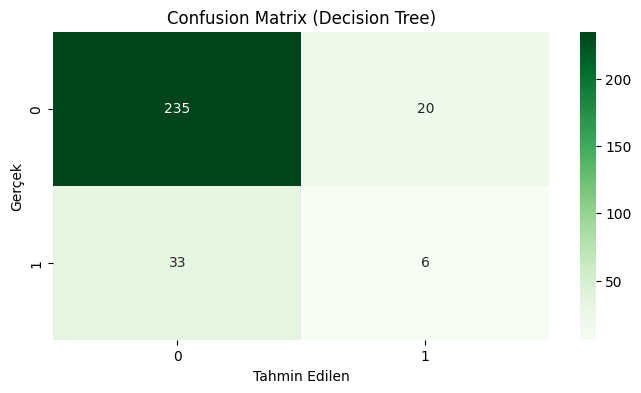

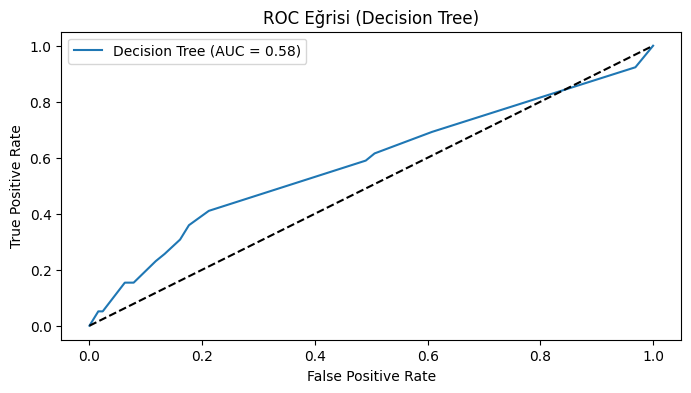

ROC AUC: 0.5821


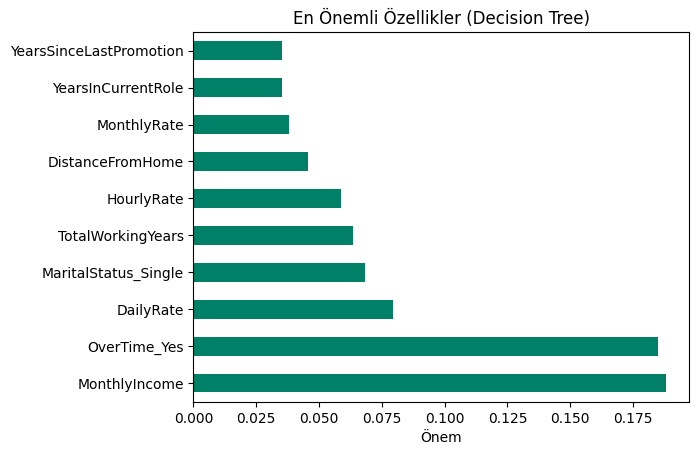

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       255
           1       0.23      0.15      0.18        39

    accuracy                           0.82       294
   macro avg       0.55      0.54      0.54       294
weighted avg       0.79      0.82      0.80       294



In [148]:
# Modeli eğitmek, tahmin yapmak, değerlendirmek (Decision Tree)

# Modeli Eğitme
decT_model = DecisionTreeClassifier(max_depth=5,min_samples_split=10) # Performansı arttırmak için
decT_model.fit(X_train, y_train)

# Test Verisinde Tahmin Yapma
y_pred = decT_model.predict(X_test)

# Değerlendirme
confusionMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred)
reports.append(classification_report(y_test, y_pred,output_dict=True))
y_pred_prob = decT_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
rocScore = roc_auc_score(y_test, y_pred_prob)

# Confusion Matrix Çizme
plt.figure(figsize=(8,4))
sns.heatmap(confusionMatrix,annot=True,fmt="d",cmap="Greens")
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

# ROC Eğrisini Çizme
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {rocScore:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi (Decision Tree)')
plt.legend()
plt.show()

print(f"ROC AUC: {rocScore:.4f}")

# En Önemli Özellikleri Belirtme
importances = decT_model.feature_importances_
features = X.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False).head(10)
feat_importance.plot(kind='barh',cmap="summer")
plt.title(f"En Önemli Özellikler (Decision Tree)")
plt.xlabel("Önem")
plt.show()

#Raporu Gösterme
print(classReport)

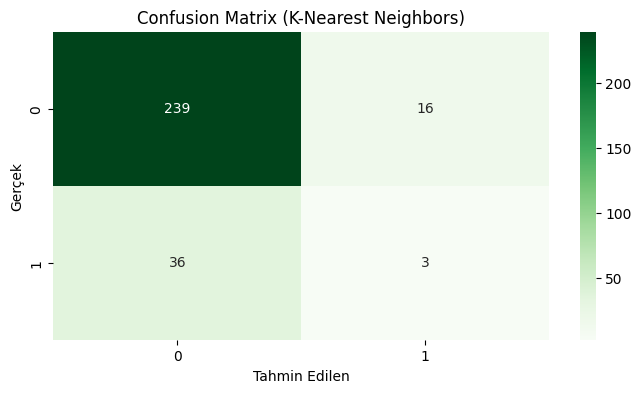

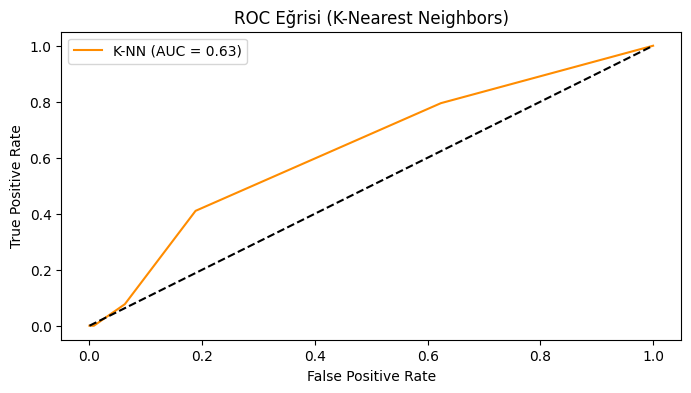


ROC AUC: 0.6328
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       255
           1       0.16      0.08      0.10        39

    accuracy                           0.82       294
   macro avg       0.51      0.51      0.50       294
weighted avg       0.77      0.82      0.80       294



In [149]:
# Modeli eğitmek, tahmin yapmak, değerlendirmek (K-Nearest Neighbors)

# Modeli Eğitme
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Test Verisinde Tahmin Yapma
y_pred = knn_model.predict(X_test)

# Değerlendirme
confusionMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred, zero_division=True)
reports.append(classification_report(y_test, y_pred, zero_division=True,output_dict=True))
y_proba = knn_model.predict_proba(X_test)[:, 1]  # Pozitif sınıfın olasılıkları
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
rocScore = roc_auc_score(y_test, y_proba)

# Confusion Matrix Çizme
plt.figure(figsize=(8,4))
sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix (K-Nearest Neighbors)")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

# ROC Eğrisini Görselleştirme
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, label=f'K-NN (AUC = {rocScore:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi (K-Nearest Neighbors)')
plt.legend()
plt.show()

print(f"\nROC AUC: {rocScore:.4f}")

# Raporu Gösterme
print(classReport)

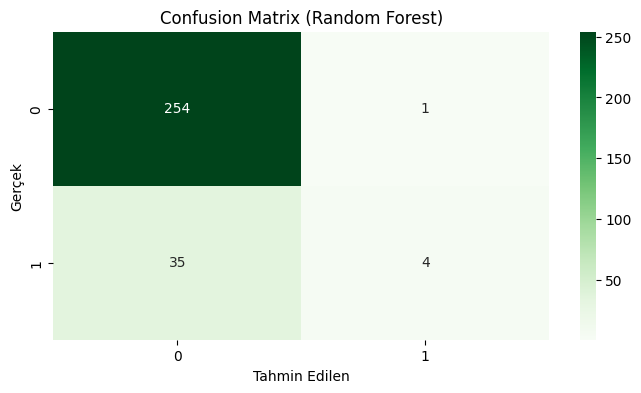

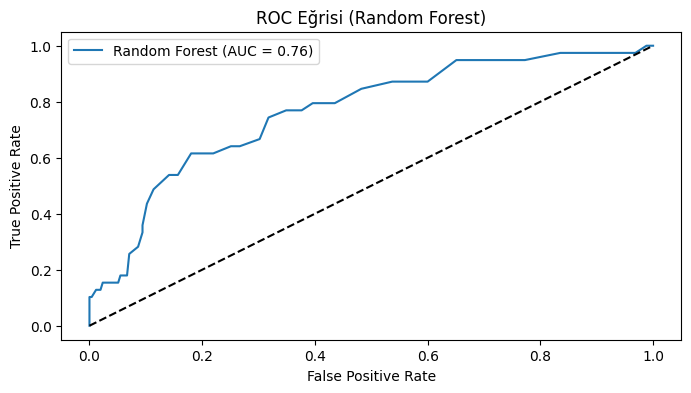

ROC AUC: 0.7650


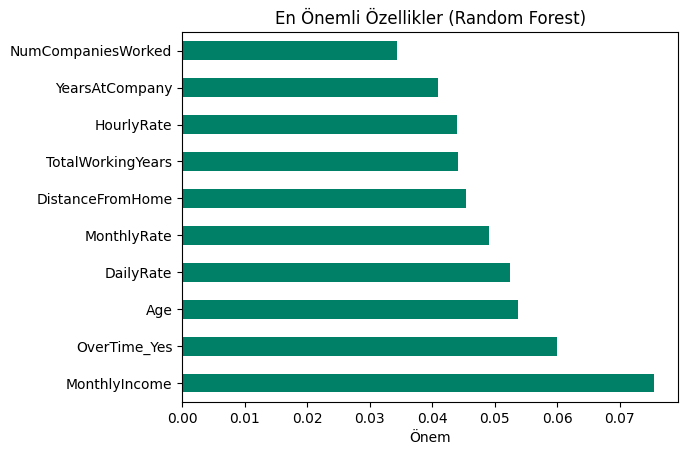

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



In [150]:
# Modeli eğitmek, tahmin yapmak, değerlendirmek (Random Forest)

# Modeli Eğitme
rndF_model = RandomForestClassifier()
rndF_model.fit(X_train, y_train)

# Test Verisinde Tahmin Yapma
y_pred = rndF_model.predict(X_test)

# Değerlendirme
confusionMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred)
reports.append(classification_report(y_test, y_pred,output_dict=True))
y_pred_prob = rndF_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
rocScore = roc_auc_score(y_test, y_pred_prob)

# Confusion Matrix Çizme
plt.figure(figsize=(8,4))
sns.heatmap(confusionMatrix,annot=True,fmt="d",cmap="Greens")
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

# ROC Eğrisini Çizme
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {rocScore:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi (Random Forest)')
plt.legend()
plt.show()

print(f"ROC AUC: {rocScore:.4f}")

# En Önemli Özellikleri Belirtme
importances = rndF_model.feature_importances_
features = X.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False).head(10)
feat_importance.plot(kind='barh',cmap="summer")
plt.title(f"En Önemli Özellikler (Random Forest)")
plt.xlabel("Önem")
plt.show()

#Raporu Gösterme
print(classReport)

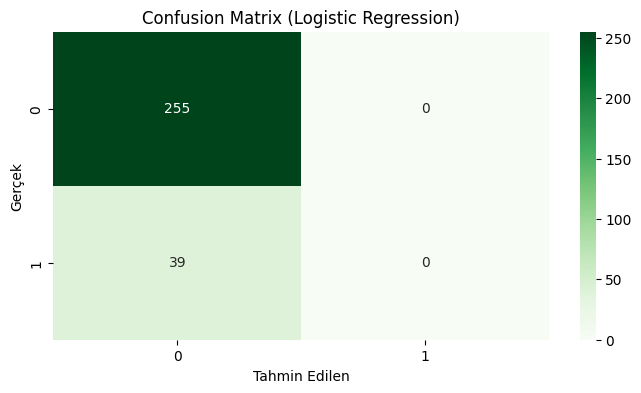

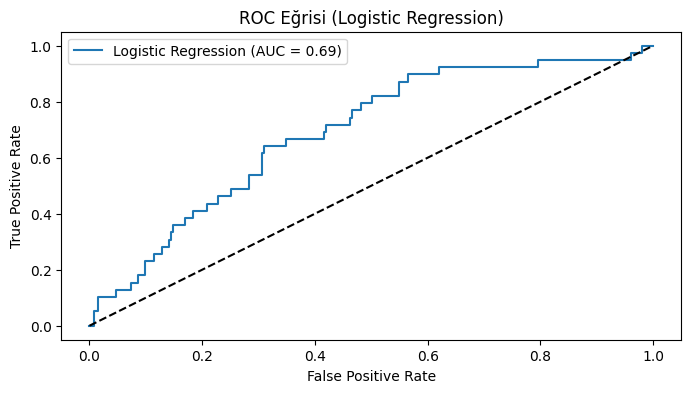

ROC AUC: 0.6903
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       1.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.93      0.50      0.46       294
weighted avg       0.88      0.87      0.81       294



In [151]:
# Modeli eğitmek, tahmin yapmak, değerlendirmek (Logistic Regression)

# Modeli Eğitme
log_model = LogisticRegression(max_iter=8500,solver="saga",fit_intercept=True)
# model.n_iter_ ile kontrol yaptık 7930 çıkıyor %10da pay verdik o yüzden 8500 iter yaptık
# solver = "saga" ise saga daha büyük veri setlerinde olduğu için
log_model.fit(X_train, y_train)

# Test Verisinde Tahmin Yapma
y_pred = log_model.predict(X_test)

# Değerlendirme
confusionMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred,zero_division=True)
reports.append(classification_report(y_test, y_pred,zero_division=True,output_dict=True))
y_pred_prob = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
rocScore = roc_auc_score(y_test, y_pred_prob)

# Confusion Matrix Çizme
plt.figure(figsize=(8,4))
sns.heatmap(confusionMatrix,annot=True,fmt="d",cmap="Greens")
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

# ROC Eğrisini Çizme
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {rocScore:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi (Logistic Regression)')
plt.legend()
plt.show()

print(f"ROC AUC: {rocScore:.4f}")

#Raporu Gösterme
print(classReport)

In [152]:
 # Verilen çalışanın işten ayrılıp ayrılmayacağını tahmin eder.
def predict_attrition(model, employee_data, feature_columns, scaler, scaled_cols):
    # 1. Boş bir DataFrame oluştur (tüm sütunlar sıfır)
    new_data = pd.DataFrame(columns=feature_columns)
    new_data.loc[0] = 0
    # 2. Çalışan verilerini ilgili sütunlara yerleştir
    for key, value in employee_data.items():
        if key in new_data.columns:
            new_data.at[0, key] = value
        else:
            print(f"⚠️ Uyarı: '{key}' modelin beklediği sütunlarda yok, atlandı.")  # Eksik sütun uyarısı
    # 3. Sayısal sütunları ölçeklendir
    new_data[scaled_cols] = scaler.transform(new_data[scaled_cols])
    # 4. Tahmin yap (0: kalacak, 1: ayrılacak)
    prediction = model.predict(new_data)[0]
    # 5. Ayrılma olasılığını al (pozitif sınıf olasılığı)
    probability = model.predict_proba(new_data)[0][1]
    # 6. Tahmin sonucunu metne çevir
    result_text = "İşten Ayrılacak" if prediction == 1 else "İşten Ayrılmayacak"
    # 7. Sonucu ve olasılığı döndür
    return result_text, probability

In [153]:
# Belirli bir çalışanın verilerine göre, tüm eğitilmiş modellerle işten ayrılma tahmini yapılır.
employee_input = {
    # Çalışanın özelliklerini elle tanımladık (örnek bir çalışan) — sayısal ve One-Hot kodlanmış veriler
    'Age': 45,
    'MonthlyIncome': 11000,
    'YearsAtCompany': 10,
    'MaritalStatus_Married': 1,
    'JobRole_Research Scientist': 1,
    'EducationField_Life Sciences': 1,
    'JobSatisfaction': 4,
    'WorkLifeBalance': 4,
    # Diğer gerekli sütunlar modele verildiğinde varsayılan olarak 0 kabul edilir
}
# Eğitilmiş tüm modelleri listeledik:
models = [xgb_model, svc_model, decT_model, knn_model, rndF_model, log_model]  


# Her model için tahmin yapılır ve sonuç ile olasılık yazdırılır
for model in models:
    result, prob = predict_attrition(model, employee_input, X.columns, scaler, scaled_columns)
    print(f"{model.__class__.__name__ }: {result} ({prob:.2%} olasılıkla)")

XGBClassifier: İşten Ayrılmayacak (36.88% olasılıkla)
SVC: İşten Ayrılmayacak (11.01% olasılıkla)
DecisionTreeClassifier: İşten Ayrılacak (100.00% olasılıkla)
KNeighborsClassifier: İşten Ayrılmayacak (0.00% olasılıkla)
RandomForestClassifier: İşten Ayrılmayacak (42.00% olasılıkla)
LogisticRegression: İşten Ayrılmayacak (49.55% olasılıkla)


In [154]:
# Tüm modellerin sınıflandırma raporlarını tutmak için boş bir liste oluşturuyoruz
processed_reports = []
# Her model ve ona karşılık gelen classification_report çıktısını eşleştirerek dönüyoruz
for model_name, report in zip(models, reports):
    # Bu modelin sonuçlarını tabloya çeviriyoruz
    df_temp = pd.DataFrame(report).transpose().reset_index()
    # Sütun isimlerini düzenle
    df_temp.columns = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support'] 
    # Model ismini ekle
    df_temp.insert(0, 'Model', model_name.__class__.__name__)
    # Hazırladığımız tabloyu genel listeye ekliyoruz
    processed_reports.append(df_temp)
# Tüm raporları tek DataFrame'de birleştir
final_df_temp = pd.concat(processed_reports)
# Sonucu göster
final_df_temp

,Model,Class,Precision,Recall,F1-Score,Support
0,XGBClassifier,0,0.901818,0.972549,0.935849,255.000000
1,XGBClassifier,1,0.631579,0.307692,0.413793,39.000000
2,XGBClassifier,accuracy,0.884354,0.884354,0.884354,0.884354
3,XGBClassifier,macro avg,0.766699,0.640121,0.674821,294.000000
4,XGBClassifier,weighted avg,0.865970,0.884354,0.866597,294.000000
0,SVC,0,0.867347,1.000000,0.928962,255.000000
1,SVC,1,1.000000,0.000000,0.000000,39.000000
2,SVC,accuracy,0.867347,0.867347,0.867347,0.867347
3,SVC,macro avg,0.933673,0.500000,0.464481,294.000000
4,SVC,weighted avg,0.884944,0.867347,0.805732,294.000000
